In [50]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale

In [2]:
letters = pd.read_csv('letter-recognition.csv')

In [4]:
letters.shape


(20000, 17)

In [5]:
letters.head()

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


In [6]:
letters.columns

Index(['letter', 'xbox ', 'ybox ', 'width ', 'height', 'onpix ', 'xbar ',
       'ybar ', 'x2bar', 'y2bar ', 'xybar ', 'x2ybar', 'xy2bar', 'xedge ',
       'xedgey', 'yedge ', 'yedgex'],
      dtype='object')

In [7]:
letters.columns = ['letter', 'xbox', 'ybox', 'width', 'height', 'onpix', 'xbar',
       'ybar', 'x2bar', 'y2bar', 'xybar', 'x2ybar', 'xy2bar', 'xedge',
       'xedgey', 'yedge', 'yedgex']
print(letters.columns)

Index(['letter', 'xbox', 'ybox', 'width', 'height', 'onpix', 'xbar', 'ybar',
       'x2bar', 'y2bar', 'xybar', 'x2ybar', 'xy2bar', 'xedge', 'xedgey',
       'yedge', 'yedgex'],
      dtype='object')


In [8]:
order = list(np.sort(letters['letter'].unique()))

In [9]:
print(order)

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']


In [10]:
letters.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   letter  20000 non-null  object
 1   xbox    20000 non-null  int64 
 2   ybox    20000 non-null  int64 
 3   width   20000 non-null  int64 
 4   height  20000 non-null  int64 
 5   onpix   20000 non-null  int64 
 6   xbar    20000 non-null  int64 
 7   ybar    20000 non-null  int64 
 8   x2bar   20000 non-null  int64 
 9   y2bar   20000 non-null  int64 
 10  xybar   20000 non-null  int64 
 11  x2ybar  20000 non-null  int64 
 12  xy2bar  20000 non-null  int64 
 13  xedge   20000 non-null  int64 
 14  xedgey  20000 non-null  int64 
 15  yedge   20000 non-null  int64 
 16  yedgex  20000 non-null  int64 
dtypes: int64(16), object(1)
memory usage: 2.6+ MB


In [11]:
letters.head()

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


In [12]:
# average feature values
round(letters.drop('letter', axis=1).mean(), 2)

xbox      4.02
ybox      7.04
width     5.12
height    5.37
onpix     3.51
xbar      6.90
ybar      7.50
x2bar     4.63
y2bar     5.18
xybar     8.28
x2ybar    6.45
xy2bar    7.93
xedge     3.05
xedgey    8.34
yedge     3.69
yedgex    7.80
dtype: float64

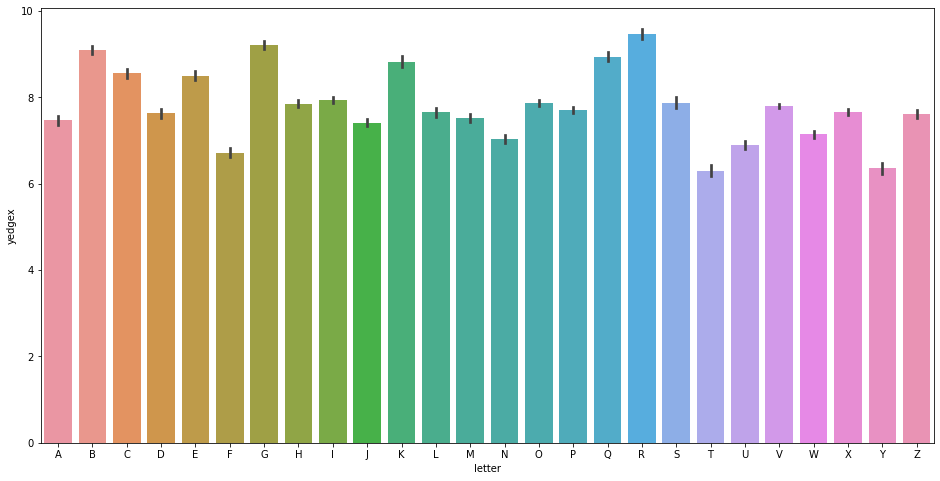

In [13]:
plt.figure(figsize=(16,8))
sns.barplot(x='letter',y='yedgex',data=letters,order=order)

In [14]:
X=letters.drop("letter",axis =1)

In [15]:
y=letters['letter']

In [16]:
X_scaled = scale(X)

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [27]:
svm = SVC(kernel='linear')

In [28]:
svm.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [29]:
pred = svm.predict(X_test)

In [30]:
svm.score(X_test,y_test)

0.8540909090909091

In [36]:
print(metrics.accuracy_score(y_true=y_test,y_pred=pred))

0.8540909090909091


In [37]:
print(metrics.confusion_matrix(y_true=y_test, y_pred=pred))

[[249   1   1   1   0   0   0   0   0   5   1   0   1   0   0   0   0   2
    1   0   1   0   0   0   1   0]
 [  1 221   0   5   1   1   0   5   1   0   2   0   0   1   0   1   0  10
    0   0   0   3   0   1   0   0]
 [  0   0 183   0   5   1   8   2   0   0   6   1   1   0   3   0   0   0
    0   0   3   0   0   0   0   0]
 [  2  10   0 255   0   0   0   3   0   1   2   0   0   6   1   0   0   0
    0   2   0   0   0   0   0   0]
 [  0   1   4   0 227   0   7   0   0   0   1   1   0   0   0   0   5   1
    5   5   0   0   0   0   0   0]
 [  0   0   1   0   1 207   2   1   2   2   0   0   0   2   0   1   0   0
    5   7   0   0   0   0   1   0]
 [  1   1  10   5   2   1 191   1   0   0   6   1   0   0   1   0  11   2
    7   0   0   4   1   0   0   0]
 [  1   6   2  16   0   2   1 151   0   3   9   0   0   2  12   2   5  21
    0   0   3   0   0   2   0   0]
 [  0   1   0   4   0   4   1   0 204  11   0   2   0   0   0   0   1   0
    4   0   0   0   0   4   0   3]
 [  7   1   0   1  

In [43]:
folds = KFold(n_splits = 5, shuffle = True, random_state = 101)

In [44]:
hyper_params = [ {'gamma': [1e-2, 1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]}]

In [45]:
model = SVC(kernel="rbf")


In [46]:
model_cv = GridSearchCV(estimator = model, 
                        param_grid = hyper_params, 
                        scoring= 'accuracy', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)   

In [51]:
model_cv.fit(X_train, y_train)                  


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:  9.5min finished


GridSearchCV(cv=KFold(n_splits=5, random_state=101, shuffle=True),
             error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000],
                          'gamma': [0.01, 0.001, 0.0001]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='accuracy', verbose=1)

In [53]:
cv_results = pd.DataFrame(model_cv.cv_results_)


In [58]:
model_cv.best_estimator_

SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [60]:
model_cv.best_score_

0.9609701492537314

In [62]:
model = SVC(C=1000, gamma=.01,kernel="rbf")

In [63]:
model.fit(X_train,y_train)

SVC(C=1000, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [64]:
y_pred = model.predict(X_test)

In [65]:
print("accuracy", metrics.accuracy_score(y_test, y_pred), "\n")
print(metrics.confusion_matrix(y_test, y_pred), "\n")

accuracy 0.9696969696969697 

[[264   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [  0 246   0   1   1   0   0   0   0   0   0   0   0   0   0   0   0   2
    0   0   0   3   0   0   0   0]
 [  0   0 205   0   2   0   1   1   0   0   1   0   0   0   2   0   0   0
    0   0   0   0   0   0   1   0]
 [  0   1   0 272   0   0   0   4   0   0   0   0   0   1   2   0   0   0
    0   2   0   0   0   0   0   0]
 [  0   2   1   0 250   0   3   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   1]
 [  0   0   0   0   1 227   0   0   1   0   0   0   0   0   0   2   0   0
    0   1   0   0   0   0   0   0]
 [  0   1   3   2   1   0 233   2   0   0   0   1   0   0   1   0   0   0
    0   0   0   1   0   0   0   0]
 [  0   4   1   3   1   0   1 208   0   0   8   0   0   0   1   2   4   3
    0   0   0   0   0   0   2   0]
 [  0   0   0   0   0   0   0   0 228  10   0   0   0   0   0   0   0   0
    0   0   0   0   0   